### Necessary libraries

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import pairwise_distances

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from gensim.similarities import MatrixSimilarity


### Loading the given data

In [4]:
user_data = pd.read_csv('consumer_transanctions.csv')
item_data = pd.read_csv('platform_content.csv')

C:\Users\A719084\AppData\Local\Temp\ipykernel_20616\3117678637.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data = pd.read_csv('consumer_transanctions.csv')


### Lets Inspect the given data

In [5]:
user_data.head()

,event_timestamp,interaction_type,item_id,consumer_id,consumer_session_id,consumer_device_info,consumer_location,country
0,1465413032,content_watched,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,content_watched,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,content_watched,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,content_followed,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,content_watched,-7820640624231356730,-445337111692715325,561148 1178424124714,NaN,NaN,NaN


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       72312 non-null  int64 
 1   interaction_type      72312 non-null  object
 2   item_id               72312 non-null  int64 
 3   consumer_id           72312 non-null  int64 
 4   consumer_session_id   72312 non-null  object
 5   consumer_device_info  56918 non-null  object
 6   consumer_location     56907 non-null  object
 7   country               56918 non-null  object
dtypes: int64(3), object(5)
memory usage: 4.4+ MB


In [7]:
user_data.describe()

,event_timestamp,item_id,consumer_id
count,7.231200e+04,7.231200e+04,7.231200e+04
mean,1.470103e+09,-3.033423e+16,1.252026e+16
std,7.258130e+06,5.344755e+18,5.022333e+18
min,1.457964e+09,-9.222795e+18,-9.223122e+18
25%,1.464876e+09,-4.726309e+18,-3.596627e+18
50%,1.468343e+09,1.893099e+16,-1.088422e+17
75%,1.474461e+09,4.441012e+18,3.766319e+18
max,1.488310e+09,9.222265e+18,9.210531e+18


In [8]:
user_data.shape

(72312, 8)

In [9]:
item_data.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,1459192779,content_pulled_out,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [10]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   event_timestamp       3122 non-null   int64 
 1   interaction_type      3122 non-null   object
 2   item_id               3122 non-null   int64 
 3   producer_id           3122 non-null   int64 
 4   producer_session_id   3122 non-null   int64 
 5   producer_device_info  680 non-null    object
 6   producer_location     680 non-null    object
 7   producer_country      680 non-null    object
 8   item_type             3122 non-null   object
 9   item_url              3122 non-null   object
 10  title                 3122 non-null   object
 11  text_description      3122 non-null   object
 12  language              3122 non-null   object
dtypes: int64(4), object(9)
memory usage: 317.2+ KB


In [11]:
item_data.describe()

,event_timestamp,item_id,producer_id,producer_session_id
count,3.122000e+03,3.122000e+03,3.122000e+03,3.122000e+03
mean,1.468804e+09,3.284110e+16,3.984819e+17,1.976675e+17
std,7.571512e+06,5.383734e+18,4.387115e+18,5.403753e+18
min,1.459193e+09,-9.222795e+18,-9.120686e+18,-9.212055e+18
25%,1.462369e+09,-4.660869e+18,-1.578288e+18,-4.651280e+18
50%,1.467136e+09,4.436584e+16,-7.092877e+17,4.154103e+17
75%,1.473873e+09,4.745617e+18,3.609194e+18,4.841644e+18
max,1.488308e+09,9.222265e+18,9.210531e+18,9.221043e+18


In [12]:
item_data.shape

(3122, 13)

### Exploratory Data Analysis

#### For consumer_transaction data

In [13]:
# Insights

print('No. of unique Item IDs - ' + str(user_data['item_id'].nunique()))
print('No. of unique Consumer IDs - ' + str(user_data['consumer_id'].nunique()))
print('No. of unique Consumer Session IDs - ' + str(user_data.consumer_session_id.nunique()))

No. of unique Item IDs - 2987
No. of unique Consumer IDs - 1895
No. of unique Consumer Session IDs - 28909


In [14]:
# Consumer Device

user_data.consumer_device_info.value_counts()

Android - Native Mobile App                                                                                                                          6761
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                       1823
Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                       1146
Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36                                            1076
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36                                        1059
                                                                                                                                                     ... 
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) C

In [15]:
sum(user_data.consumer_device_info.isna())

15394

In [16]:
# Consumer Location

user_data.consumer_location.value_counts(dropna= False)

SP     40164
NaN    15405
MG     10229
NY      1257
TX       923
       ...  
R          1
CE         1
NH         1
MN         1
CL         1
Name: consumer_location, Length: 72, dtype: int64

In [17]:
# Consumer Country

geo_stats = user_data.country.value_counts(normalize= True, dropna= False)*100

In [18]:
geo_stats = pd.DataFrame(geo_stats).reset_index()

In [19]:
geo_stats.columns = ['Country', 'Values']

In [20]:
geo_stats

,Country,Values
0,BR,71.075340
1,NaN,21.288306
2,US,6.440148
3,KR,0.330512
4,CA,0.312535
5,JP,0.199137
6,AU,0.190840
7,GB,0.030424
8,DE,0.026275
9,IE,0.019361


<AxesSubplot:>

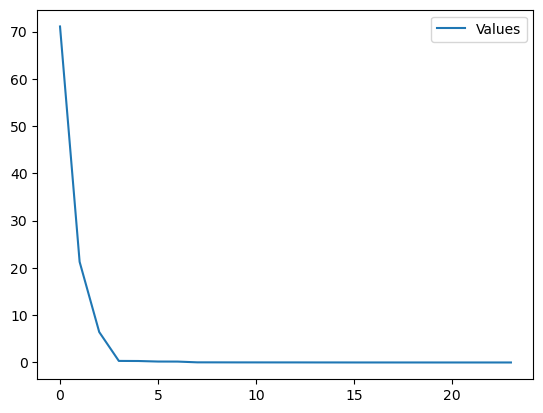

In [21]:
geo_stats.plot()

In [22]:
# Lets remove the coloumns less usefull

user_data = user_data[['consumer_id' , 'item_id', 'interaction_type']]

In [23]:
user_data.head()

,consumer_id,item_id,interaction_type
0,-8845298781299428018,-3499919498720038879,content_watched
1,-1032019229384696495,8890720798209849691,content_watched
2,-1130272294246983140,310515487419366995,content_watched
3,344280948527967603,310515487419366995,content_followed
4,-445337111692715325,-7820640624231356730,content_watched


In [24]:
# Interaction type

user_data.interaction_type.value_counts(dropna= False)

content_watched         61086
content_liked            5745
content_saved            2463
content_commented_on     1611
content_followed         1407
Name: interaction_type, dtype: int64

In [25]:
interaction_stats = user_data.interaction_type.value_counts(normalize=True, dropna=False)*100
interaction_stats = pd.DataFrame(interaction_stats).reset_index()
interaction_stats.columns = ['Interaction Type', 'Values']
interaction_stats

,Interaction Type,Values
0,content_watched,84.475606
1,content_liked,7.944739
2,content_saved,3.406074
3,content_commented_on,2.227846
4,content_followed,1.945735


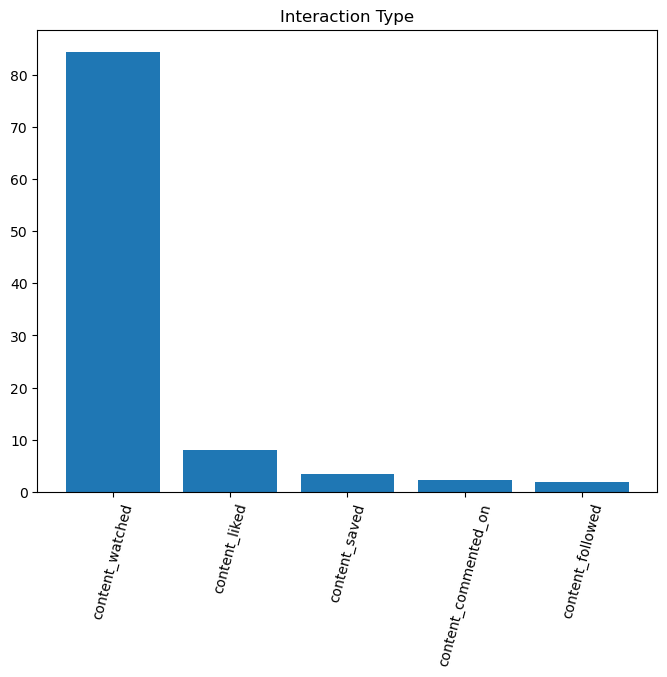

In [26]:
# Catgorize interaction type to arrive at ratings
plt.figure(figsize=(8,6))
plt.xticks(rotation=75)
plt.bar(x = interaction_stats['Interaction Type'], height=interaction_stats.Values)
plt.title('Interaction Type')
plt.show()

#### For platform_content data

In [27]:
# Producer Location

item_data.producer_location.value_counts(dropna=False)

NaN    2442
SP      533
MG       75
NY       20
NJ       16
GA        7
IL        6
RJ        4
ON        4
NSW       2
TX        2
?         2
SC        2
RI        1
AB        1
FL        1
13        1
WA        1
CA        1
MS        1
Name: producer_location, dtype: int64

In [28]:
# Found two values with '?'

item_data[item_data.producer_location == '?']

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
2968,1484666440,content_present,5135371516547401748,2416280733544962613,5817055449267712130,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,?,US,HTML,http://buytaert.net/acquia-retrospective-2016,Dries Buytaert,"As my loyal blog readers know, at the beginnin...",en
3006,1485316870,content_present,-3900870368325485697,-2726721797588771398,-1022963948596515475,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...,?,US,HTML,http://www.cmswire.com/digital-experience/adob...,"Adobe, Acquia, Episerver Lead New Forrester WC...","Forrester's WCM Wave favors Adobe, Acquia and ...",en


In [29]:
# Lets check the heighest count

(item_data.producer_location[item_data.producer_country == 'US']).value_counts()

NY    20
NJ    16
GA     7
IL     6
TX     2
?      2
SC     2
RI     1
FL     1
WA     1
CA     1
Name: producer_location, dtype: int64

In [30]:
# Lets impute the value, replace "?" with "NY"

item_data.producer_location.loc[item_data.producer_location == '?'] = 'NY'

C:\Users\A719084\AppData\Local\Temp\ipykernel_20616\189911641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  item_data.producer_location.loc[item_data.producer_location == '?'] = 'NY'


In [31]:
item_data.producer_location.value_counts()

SP     533
MG      75
NY      22
NJ      16
GA       7
IL       6
ON       4
RJ       4
NSW      2
TX       2
SC       2
RI       1
AB       1
FL       1
13       1
WA       1
CA       1
MS       1
Name: producer_location, dtype: int64

In [32]:
producer_loc = item_data.producer_location.value_counts(normalize=True, dropna=False)*100
producer_loc = pd.DataFrame(producer_loc).reset_index()
producer_loc.columns = ['Location', 'Values']

In [33]:
producer_loc = producer_loc.iloc[1:,:]
producer_loc

,Location,Values
1,SP,17.072389
2,MG,2.402306
3,NY,0.704676
4,NJ,0.512492
5,GA,0.224215
6,IL,0.192184
7,ON,0.128123
8,RJ,0.128123
9,NSW,0.064061
10,TX,0.064061


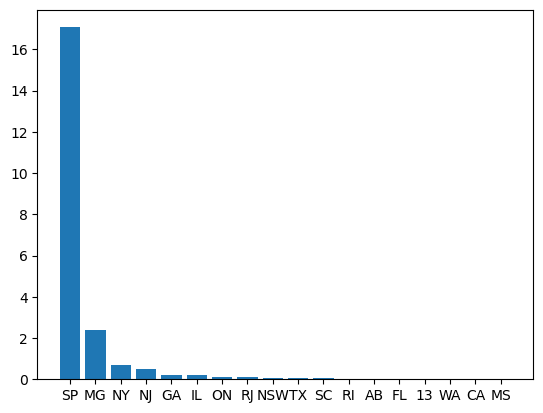

In [34]:
plt.bar(x = producer_loc.Location, height=producer_loc.Values)
plt.show()

In [35]:
# Producer Country

item_data.producer_country.value_counts(dropna=False)

NaN    2442
BR      613
US       59
CA        5
AU        2
PT        1
Name: producer_country, dtype: int64

In [36]:
producer_country = item_data.producer_country.value_counts(normalize=True, dropna=False)*100
producer_country = pd.DataFrame(producer_country).reset_index()
producer_country.columns = ['Country', 'Values']
producer_country

,Country,Values
0,NaN,78.219090
1,BR,19.634849
2,US,1.889814
3,CA,0.160154
4,AU,0.064061
5,PT,0.032031


In [37]:
producer_country = producer_country.iloc[1:,:]

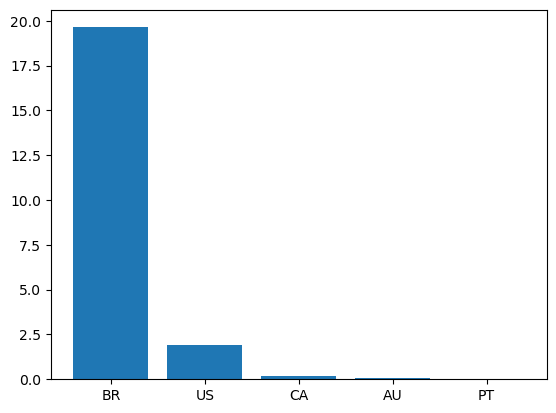

In [38]:
plt.bar(x=producer_country.Country, height=producer_country.Values)
plt.show()

In [39]:
# Item type

item_data.item_type.value_counts(dropna=False)

HTML     3101
VIDEO      11
RICH       10
Name: item_type, dtype: int64

In [40]:
# Languages

item_data.language.value_counts(dropna= False)

en    2264
pt     850
la       4
es       2
ja       2
Name: language, dtype: int64

<AxesSubplot:ylabel='language'>

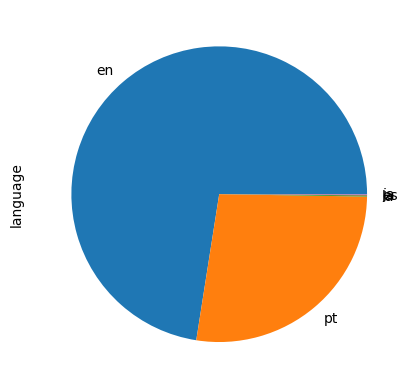

In [41]:
## Arrive at language statistics - we can consider English language articles alone
lang_stats = item_data.language.value_counts(normalize=True)
lang_stats.plot.pie()

### Data Preparing

In [42]:
# Lets impute interaction type

interaction_stats

,Interaction Type,Values
0,content_watched,84.475606
1,content_liked,7.944739
2,content_saved,3.406074
3,content_commented_on,2.227846
4,content_followed,1.945735


In [43]:
consumer_ratings = user_data.copy()

In [44]:
# lets impute Item and Consumer ID

consumer_ratings['user_id'] = consumer_ratings.groupby(['consumer_id']).ngroup()
consumer_ratings['news_id'] = consumer_ratings.groupby(['item_id']).ngroup()

In [45]:
consumer_ratings.head()

,consumer_id,item_id,interaction_type,user_id,news_id
0,-8845298781299428018,-3499919498720038879,content_watched,33,933
1,-1032019229384696495,8890720798209849691,content_watched,831,2933
2,-1130272294246983140,310515487419366995,content_watched,826,1537
3,344280948527967603,310515487419366995,content_followed,974,1537
4,-445337111692715325,-7820640624231356730,content_watched,887,246


In [46]:
consumer_ratings['ratings'] = consumer_ratings['interaction_type'].map({'content_followed' : 5,'content_commented_on' : 4, 'content_saved' : 3, 'content_liked' : 2, 'content_watched' : 1})

In [47]:
consumer_ratings.ratings.value_counts()

1    61086
2     5745
3     2463
4     1611
5     1407
Name: ratings, dtype: int64

In [48]:
consumer_ratings.interaction_type.value_counts()

content_watched         61086
content_liked            5745
content_saved            2463
content_commented_on     1611
content_followed         1407
Name: interaction_type, dtype: int64

In [49]:
consumer_ratings.drop('interaction_type', axis = 1, inplace = True)

In [50]:
consumer_ratings.shape

(72312, 5)

In [51]:
consumer_ratings.drop_duplicates(inplace= True)

In [52]:
consumer_ratings.shape

(50938, 5)

In [53]:
consumer_ratings.head()

,consumer_id,item_id,user_id,news_id,ratings
0,-8845298781299428018,-3499919498720038879,33,933,1
1,-1032019229384696495,8890720798209849691,831,2933,1
2,-1130272294246983140,310515487419366995,826,1537,1
3,344280948527967603,310515487419366995,974,1537,5
4,-445337111692715325,-7820640624231356730,887,246,1


In [54]:
# number of uniqe users and items

n_users = consumer_ratings.user_id.nunique()
n_items = consumer_ratings.news_id.nunique()

In [55]:
print("Number of unique Users : " + str(n_users))
print("Number of unique Items : " + str(n_items))

Number of unique Users : 1895
Number of unique Items : 2987


In [56]:
ratings = consumer_ratings.iloc[:,2:]

In [57]:
ratings

,user_id,news_id,ratings
0,33,933,1
1,831,2933,1
2,826,1537,1
3,974,1537,5
4,887,246,1
...,...,...,...
72303,1529,2093,1
72304,400,1583,3
72307,17,443,2
72309,4,1153,1


### User based Collaborative Filtering

In [58]:
# let us first create Empty data matrix

data_mat = np.zeros((n_users, n_items))
data_mat.shape

(1895, 2987)

In [59]:
# fill the data matrix with rating values

for line in ratings.itertuples():
    data_mat[line[1]-1, line[2]-1] = line[3]

In [60]:
# print the data matrix
data_mat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# Predict the user similarity - cosine similarity

user_sim = 1 - pairwise_distances(data_mat, metric= 'cosine')
user_sim

array([[1.        , 0.1118034 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1118034 , 1.        , 0.        , ..., 0.13363062, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.08891084],
       ...,
       [0.        , 0.13363062, 0.        , ..., 1.        , 0.        ,
        0.03940552],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.04648022],
       [0.        , 0.        , 0.08891084, ..., 0.03940552, 0.04648022,
        1.        ]])

In [62]:
user_sim.shape

(1895, 1895)

## Item Similarity Data Matrix

In [63]:
# data matrix * item similarity

item_pred = np.dot(user_sim, data_mat)
item_pred.shape

(1895, 2987)

In [64]:
item_pred

array([[1.51072467, 0.14627463, 0.88663017, ..., 0.33072469, 0.10823162,
        0.12681844],
       [3.76780838, 0.23170633, 0.89922711, ..., 0.63387255, 0.13046205,
        0.10336171],
       [0.04065578, 0.09832051, 0.24081988, ..., 0.23632899, 0.03527147,
        1.05833479],
       ...,
       [0.5664924 , 0.67668807, 1.78588986, ..., 0.80990409, 0.1208321 ,
        0.51230633],
       [0.10345375, 1.45129543, 3.28676135, ..., 1.2697992 , 0.22368166,
        0.25181728],
       [0.24990274, 0.76214912, 2.76393507, ..., 1.23533225, 0.29885225,
        1.88521383]])

In [65]:
pred_df = pd.DataFrame(item_pred)
pred_df.shape

(1895, 2987)

In [66]:
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
0,1.510725,0.146275,0.886630,0.000000,0.685897,0.000000,0.318857,0.120362,0.000000,0.154661,...,0.181632,0.091965,0.025364,0.232597,0.075749,0.150755,0.039265,0.330725,0.108232,0.126818
1,3.767808,0.231706,0.899227,0.157766,0.954129,0.000000,0.894394,0.022428,0.117356,0.162838,...,0.418745,0.117932,0.023477,0.255368,0.319328,0.407883,0.206035,0.633873,0.130462,0.103362
2,0.040656,0.098321,0.240820,0.130084,0.237418,0.000000,0.650422,0.000000,0.070768,0.000000,...,0.276056,0.239909,0.217969,0.099101,0.068149,0.165096,0.149596,0.236329,0.035271,1.058335
3,0.000000,0.958789,1.128035,0.052862,0.578294,0.019042,0.124345,0.016954,0.015721,0.120286,...,0.107759,0.060249,0.024922,0.754437,0.353610,0.144241,0.047743,0.270874,0.056450,0.124611
4,0.102062,0.224202,1.223905,0.048408,0.457971,0.014543,0.163290,0.064744,0.218261,0.075814,...,0.196496,0.121120,0.010915,0.269874,0.163411,0.271409,0.251620,0.478999,0.079838,0.104637


## Lets get the News recommendation for User 10

In [67]:
# dataframe with User 10 recommendation

recommended_10 = pd.DataFrame(pred_df.iloc[10].sort_values(ascending = False)).reset_index()

In [68]:
recommended_10.columns = ['news_id', 'values']
recommended_10.shape

(2987, 2)

In [69]:
recommended_10.head()

,news_id,values
0,307,10.860273
1,422,2.010328
2,2329,1.892686
3,1177,1.878166
4,1044,1.790521


## Merge the data with news rating 

In [70]:
# Getting item and news IDs in DataFrame

ids = consumer_ratings[['item_id', 'news_id']].drop_duplicates()
ids.shape

(2987, 2)

In [71]:
ids.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [72]:
recommended_10 = pd.merge(recommended_10, ids, how = 'left', on = 'news_id')
recommended_10.head()

,news_id,values,item_id
0,307,10.860273,-7463572107837163154
1,422,2.010328,-6713697716910928909
2,2329,1.892686,5237574390644778994
3,1177,1.878166,-1802980374508081539
4,1044,1.790521,-2747266787901704910


In [73]:
# Getting Item ID and Title from Platform_content data

titles = item_data[['item_id', 'title']]
titles.head()

,item_id,title
0,-6451309518266745024,"Ethereum, a Virtual Currency, Enables Transact..."
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transact..."
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins O...
3,-6151852268067518688,Google Data Center 360° Tour
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockc..."


In [74]:
# Lets merge them

recommended_10 = pd.merge(recommended_10, titles, how = 'left', on = 'item_id')
recommended_10.head()

,news_id,values,item_id,title
0,307,10.860273,-7463572107837163154,Google's new translation software is almost as...
1,422,2.010328,-6713697716910928909,Solidity Available in Visual Studio - Ethereum...
2,2329,1.892686,5237574390644778994,Meet Parsey's Cousins: Syntax for 40 languages...
3,1177,1.878166,-1802980374508081539,Google's Schmidt Says Computers Not a Threat t...
4,1044,1.790521,-2747266787901704910,Bayer propõe comprar Monsanto para formar a ma...


In [75]:
# Lets impute normalized score

recommended_10['Normalized_score'] = (recommended_10['values'] - min(recommended_10['values'])) / (max(recommended_10['values']) - min(recommended_10['values']))

In [76]:
# Top 10 recommended items

recommended_10.sort_values(by = 'Normalized_score', ascending= False)[['title', 'Normalized_score']][:10]

,title,Normalized_score
0,Google's new translation software is almost as...,1.000000
1,Solidity Available in Visual Studio - Ethereum...,0.185108
2,Meet Parsey's Cousins: Syntax for 40 languages...,0.174276
3,Google's Schmidt Says Computers Not a Threat t...,0.172939
4,Bayer propõe comprar Monsanto para formar a ma...,0.164869
5,Singapore bank wants you to talk to its chatbo...,0.159650
6,Running GV sprints inside corporates - learn f...,0.151982
7,19 Tips For Everyday Git Use,0.150547
8,Seguro de Pessoas,0.148662
9,Video: Steve Wozniak discusses the importance ...,0.143863


### Evaluation

In [77]:
# Lets define Evaluation functions

# MAE
def mae(pred, truth):
    pred = pred[truth.nonzero()]
    truth = truth[truth.nonzero()]
    return mean_absolute_error(pred, truth)

# RMSE
def rmse(pred, truth):
    pred = pred[truth.nonzero()]
    truth = truth[truth.nonzero()]
    return sqrt(mean_squared_error(pred, truth))

#### RMSE

In [78]:
rmse(item_pred, data_mat)

7.36675597603169

#### MAE

In [79]:
mae(item_pred, data_mat)

4.327126564140783

#### Precision@K

In [80]:
# actual ratings

actual_ratings = ratings[ratings['user_id'] == 10].sort_values(by = 'ratings', ascending= False)["news_id"].tolist()
actual_ratings

[2109,
 2018,
 2703,
 188,
 2326,
 290,
 687,
 1875,
 694,
 2680,
 2577,
 1973,
 2901,
 2566,
 1600,
 307,
 2909,
 2333,
 826,
 2632,
 346,
 2943,
 135,
 2017,
 167,
 1648,
 569,
 1984,
 2739,
 65,
 2189,
 1526,
 493,
 282,
 1609,
 1776,
 1782,
 1709,
 702,
 650,
 2339,
 1917,
 2543]

In [81]:
# Predicted ratings

predicted_ratings = pred_df.iloc[10].sort_values(ascending = False)[:10].index.tolist()

In [82]:
predicted_ratings

[307, 422, 2329, 1177, 1044, 36, 1936, 2899, 788, 2003]

In [83]:
precision_10 = len(list(set(actual_ratings) & set(predicted_ratings)))/10

In [84]:
precision_10

0.1

In [85]:
ratings.user_id.nunique()

1895

#### Global Average Precision@K

In [86]:
global_precision = 0

for n in range(0, ratings.user_id.nunique()):
    actual_ratings_set = ratings[ratings['user_id'] == n].sort_values(by = 'ratings', ascending = False)['news_id'].tolist()
    predicted_ratings_set = pred_df.iloc[n].sort_values(ascending = False)[:10].index.tolist()
    precision_10 = (len(list(set(actual_ratings_set) & set(predicted_ratings_set))))/10
    global_precision = global_precision + precision_10

In [87]:
global_precision

11.799999999999985

In [88]:
global_avg_precision = global_precision / ratings['user_id'].nunique()
global_avg_precision

0.006226912928759886

#### Filter Contents which have not viewed by user already

In [89]:
user_df = ratings[ratings['user_id'] == 17]
user_df.shape

(408, 3)

In [90]:
ratings.shape

(50938, 3)

In [91]:
final_output = pd.merge(recommended_10, user_df, how = 'left', on = 'news_id')
final_output

,news_id,values,item_id,title,Normalized_score,user_id,ratings
0,307,10.860273,-7463572107837163154,Google's new translation software is almost as...,1.000000,NaN,NaN
1,422,2.010328,-6713697716910928909,Solidity Available in Visual Studio - Ethereum...,0.185108,NaN,NaN
2,2329,1.892686,5237574390644778994,Meet Parsey's Cousins: Syntax for 40 languages...,0.174276,NaN,NaN
3,1177,1.878166,-1802980374508081539,Google's Schmidt Says Computers Not a Threat t...,0.172939,NaN,NaN
4,1044,1.790521,-2747266787901704910,Bayer propõe comprar Monsanto para formar a ma...,0.164869,NaN,NaN
...,...,...,...,...,...,...,...
3110,1454,0.000000,-115909536143817330,8 must-see sessions for application developers...,0.000000,NaN,NaN
3111,1453,0.000000,-133139342397538859,"Novo workaholic trabalha, pratica esportes e t...",0.000000,17.0,1.0
3112,1450,0.000000,-158184760257182670,Plug the Fathom Neural Compute Stick into any ...,0.000000,NaN,NaN
3113,1448,0.000000,-170687954910264210,As compras e os hábitos dos brasileiros no sho...,0.000000,NaN,NaN


In [92]:
# Lets check ratings column

final_output.ratings.value_counts(dropna=True)

1.0    345
2.0     34
5.0     14
4.0     10
3.0      8
Name: ratings, dtype: int64

In [93]:
final_output = final_output.drop(final_output[final_output['ratings'] > 0].index)

In [94]:
final_output.title[:10]

0     Google's new translation software is almost as...
1     Solidity Available in Visual Studio - Ethereum...
2     Meet Parsey's Cousins: Syntax for 40 languages...
3     Google's Schmidt Says Computers Not a Threat t...
4     Bayer propõe comprar Monsanto para formar a ma...
5     Singapore bank wants you to talk to its chatbo...
8                                     Seguro de Pessoas
9     Video: Steve Wozniak discusses the importance ...
10    AI Is Here to Help You Write Emails People Wil...
11    [Security] How to Set Expiration Dates for Sha...
Name: title, dtype: object

In [95]:
final_output.shape

(2704, 7)

### Item based Collaborative filtering

In [96]:
data_mat.shape

(1895, 2987)

In [97]:
# Transposing Data Matrix

data_mat.T

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [98]:
data_mat.shape

(1895, 2987)

In [99]:
## Item bases similarity
item_sim = 1 - pairwise_distances(data_mat.T, metric='cosine')

In [100]:
item_sim.shape

(2987, 2987)

In [101]:
item_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.15075567, ..., 0.03892495, 0.09534626,
        0.        ],
       [0.        , 0.15075567, 1.        , ..., 0.15061602, 0.        ,
        0.13699916],
       ...,
       [0.        , 0.03892495, 0.15061602, ..., 1.        , 0.08164966,
        0.        ],
       [0.        , 0.09534626, 0.        , ..., 0.08164966, 1.        ,
        0.        ],
       [0.        , 0.        , 0.13699916, ..., 0.        , 0.        ,
        1.        ]])

In [102]:
## new data frame based on item similarity news recommendation
news_pred = pd.DataFrame(item_sim)
news_pred

,0,1,2,3,4,5,6,7,8,9,...,2977,2978,2979,2980,2981,2982,2983,2984,2985,2986
0,1.000000,0.000000,0.000000,0.000000,0.062017,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.150756,0.000000,0.083624,0.0,0.000000,0.000000,0.000000,0.106600,...,0.000000,0.000000,0.000000,0.100504,0.337100,0.044455,0.000000,0.038925,0.095346,0.000000
2,0.000000,0.150756,1.000000,0.000000,0.138675,0.0,0.123091,0.117851,0.102062,0.294628,...,0.194444,0.083333,0.105409,0.277778,0.074536,0.049147,0.077152,0.150616,0.000000,0.136999
3,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.178174,0.000000,0.169031,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219687
4,0.062017,0.083624,0.138675,0.000000,1.000000,0.0,0.102418,0.000000,0.000000,0.098058,...,0.046225,0.069338,0.000000,0.184900,0.124035,0.245358,0.000000,0.035806,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,0.000000,0.044455,0.049147,0.000000,0.245358,0.0,0.217786,0.000000,0.180579,0.000000,...,0.294884,0.442326,0.000000,0.049147,0.065938,1.000000,0.409514,0.076139,0.093250,0.000000
2983,0.000000,0.000000,0.077152,0.000000,0.000000,0.0,0.113961,0.000000,0.000000,0.000000,...,0.154303,0.385758,0.195180,0.000000,0.000000,0.409514,1.000000,0.039841,0.097590,0.126837
2984,0.000000,0.038925,0.150616,0.000000,0.035806,0.0,0.031782,0.000000,0.000000,0.000000,...,0.043033,0.129099,0.000000,0.129099,0.057735,0.076139,0.039841,1.000000,0.081650,0.000000
2985,0.000000,0.095346,0.000000,0.000000,0.000000,0.0,0.077850,0.000000,0.000000,0.000000,...,0.105409,0.158114,0.000000,0.000000,0.000000,0.093250,0.097590,0.081650,1.000000,0.000000


In [103]:
# Similar items for article 20

item_recommendation = pd.DataFrame(news_pred.iloc[20].sort_values(ascending = False)).reset_index()
item_recommendation.columns = ['news_id', 'value']
item_recommendation.head()

,news_id,value
0,20,1.0
1,2501,0.5
2,110,0.5
3,1172,0.5
4,1487,0.5


In [104]:
ids.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [105]:
# Lets merge above two

sim_articles_20 = pd.merge(item_recommendation, ids, how='left', on='news_id')
sim_articles_20.head()

,news_id,value,item_id
0,20,1.0,-9107331682787867601
1,2501,0.5,6237714845306489877
2,110,0.5,-8689461307495241608
3,1172,0.5,-1852324383183073754
4,1487,0.5,1984587708208773


In [106]:
# Merging with Item Data provided

sim_articles_20 = pd.merge(sim_articles_20, item_data, how = 'left', on = 'item_id')
sim_articles_20.head()

,news_id,value,item_id,event_timestamp,interaction_type,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
0,20,1.0,-9107331682787867601,1459268965,content_present,-1032019229384696495,3042342415047984532,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/03/29/hopper-raises...,Hopper raises $16 million for a travel app tha...,"Hopper , the makers of a handy travel applicat...",en
1,2501,0.5,6237714845306489877,1469197339,content_present,5598537709124463353,4251869051817656115,NaN,NaN,NaN,HTML,https://hbr.org/2016/07/how-ceos-can-keep-thei...,How CEOs Can Keep Their Analytics Programs fro...,Create a FREE account to: Get eight free artic...,en
2,110,0.5,-8689461307495241608,1460996812,content_present,-1032019229384696495,1310371857892872479,NaN,NaN,NaN,HTML,http://techcrunch.com/2016/04/18/ebays-mobile-...,Ebay's mobile Craigslist competitor Close5 has...,"In the U.S., the online classifieds space has ...",en
3,1172,0.5,-1852324383183073754,1461842382,content_present,-2979881261169775358,7934012616444916415,NaN,NaN,NaN,HTML,https://blog.bitpay.com/load-your-steam-wallet...,Load Your Steam Wallet Using Bitcoin,Today we're announcing a new payment integrati...,en
4,1487,0.5,1984587708208773,1486118047,content_present,-7606731662737258050,-8411451603021851508,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR,HTML,http://g1.globo.com/pop-arte/cinema/noticia/he...,Heroínas de 'Estrelas além do tempo' inspiram ...,Foto de meninas vestidas como trabalhadoras da...,pt


In [107]:
sim_articles_20 = sim_articles_20[['news_id', 'item_id', 'title', 'value']]
sim_articles_20.head()

,news_id,item_id,title,value
0,20,-9107331682787867601,Hopper raises $16 million for a travel app tha...,1.0
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs fro...,0.5
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has...,0.5
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram ...,0.5


In [108]:
# Lets impute normalized score

sim_articles_20['normalized_score'] = (sim_articles_20['value'] - min(sim_articles_20['value'])) / (max(sim_articles_20['value']) - min(sim_articles_20['value']))
sim_articles_20.sort_values(by='normalized_score', ascending= False)
sim_articles_20.head()

,news_id,item_id,title,value,normalized_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app tha...,1.0,1.0
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs fro...,0.5,0.5
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has...,0.5,0.5
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram ...,0.5,0.5


### Content based Recommendation

In [109]:
item_data.shape

(3122, 13)

In [110]:
# Lets filter Language to English only and Interaction type with 'Content_present'

eng_items = item_data[(item_data['language'] == 'en') & (item_data['interaction_type'] == 'content_present')]
eng_items.shape

(2211, 13)

In [111]:
eng_items.head()

,event_timestamp,interaction_type,item_id,producer_id,producer_session_id,producer_device_info,producer_location,producer_country,item_type,item_url,title,text_description,language
1,1459193988,content_present,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,content_present,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,content_present,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,content_present,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
5,1459194522,content_present,-2826566343807132236,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.coindesk.com/ieee-blockchain-oxford...,IEEE to Talk Blockchain at Cloud Computing Oxf...,One of the largest and oldest organizations fo...,en


In [112]:
eng_items = eng_items[['item_url', 'title', 'text_description']]

In [113]:
# text_description column

pd.set_option('max_colwidth', None)
eng_items.head()

item_url  \
1  http://www.nytimes.com/2016/03/28/business/dealbook/ethereum-a-virtual-currency-enables-transactions-that-rival-bitcoins.html   
2                                http://cointelegraph.com/news/bitcoin-future-when-gbpcoin-of-branson-wins-over-usdcoin-of-trump   
3                                                  https://cloudplatform.googleblog.com/2016/03/Google-Data-Center-360-Tour.html   
4                    https://bitcoinmagazine.com/articles/ibm-wants-to-evolve-the-internet-with-blockchain-technology-1459189322   
5                                                                http://www.coindesk.com/ieee-blockchain-oxford-cloud-computing/   

                                                                     title  \
1  Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's   
2       Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump   
3                                             Google Data Center 360° Tour   
4            IBM Wants to "Evolve the Internet" With Blockchain Technology   
5         IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [114]:
# Lets create an Array

description_array = eng_items.text_description.to_numpy()
description_array[0]

'All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by authorities given that potentially fraudulent contracts, like the Ponzi schemes, can be written directly into the Ethereum system. But the sophisticated capabilities of the system have made it fascinating to some executives in corporate America. IBM said last year that it was experimenting with Ethereum as a way to control real world objects in the so-called Internet of things. Microsoft has been working on several projects that make it easier to use Ethereum on its computing cloud, Azure. "Et

In [115]:
len(description_array), len(description_array[0])

(2211, 6543)

In [116]:
word_list = []

for keyword in description_array:
    splitted_words = keyword.lower().split()
    word_list.append(splitted_words)

In [117]:
word_list[0]

['all',
 'of',
 'this',
 'work',
 'is',
 'still',
 'very',
 'early.',
 'the',
 'first',
 'full',
 'public',
 'version',
 'of',
 'the',
 'ethereum',
 'software',
 'was',
 'recently',
 'released,',
 'and',
 'the',
 'system',
 'could',
 'face',
 'some',
 'of',
 'the',
 'same',
 'technical',
 'and',
 'legal',
 'problems',
 'that',
 'have',
 'tarnished',
 'bitcoin.',
 'many',
 'bitcoin',
 'advocates',
 'say',
 'ethereum',
 'will',
 'face',
 'more',
 'security',
 'problems',
 'than',
 'bitcoin',
 'because',
 'of',
 'the',
 'greater',
 'complexity',
 'of',
 'the',
 'software.',
 'thus',
 'far,',
 'ethereum',
 'has',
 'faced',
 'much',
 'less',
 'testing,',
 'and',
 'many',
 'fewer',
 'attacks,',
 'than',
 'bitcoin.',
 'the',
 'novel',
 'design',
 'of',
 'ethereum',
 'may',
 'also',
 'invite',
 'intense',
 'scrutiny',
 'by',
 'authorities',
 'given',
 'that',
 'potentially',
 'fraudulent',
 'contracts,',
 'like',
 'the',
 'ponzi',
 'schemes,',
 'can',
 'be',
 'written',
 'directly',
 'into',
 

In [118]:
len(word_list), len(word_list[0]) , len(word_list[1])

(2211, 1072, 311)

In [119]:
# Lets create dictionary
dictionary = Dictionary(word_list)

# Bag of Words
bow = [dictionary.doc2bow(doc) for doc in word_list]

# TFIDF model
tfidf = TfidfModel(bow)

# Similarity Matrix
sims = MatrixSimilarity(tfidf[bow], num_features=len(dictionary))

In [120]:
print(sims)

MatrixSimilarity<2211 docs, 113134 features>


In [121]:
def item_recommendation(items_title):
    items = eng_items.loc[eng_items.title == items_title]
    keywords = items.text_description.iloc[0].split()
    query = keywords
    query_bow = dictionary.doc2bow(query)
    query_tfidf = tfidf[query_bow]
    sim_array = sims[query_tfidf]
    sim_series = pd.Series(sim_array.tolist(), index = eng_items.title.values)
    sim_output = sim_series.sort_values(ascending=False)
    return sim_output

In [122]:
# Lets get top 10 similar articles for

print('Top 10 similar articles for \"' + eng_items.title.iloc[2] + '\"')
print('-' * 100)
item_recommendation(eng_items.title.iloc[2])[:10]

Top 10 similar articles for "Google Data Center 360° Tour"
----------------------------------------------------------------------------------------------------


Google Data Center 360° Tour                                                            0.802829
Google shares data center security and design best practices                            0.158404
Slack swips at Skype with video calls and reaction emoji                                0.119946
[Tools] Free Business Video Conference with Screen Sharing, Permanent Room              0.103585
Globo.com Uses NGINX for Streaming Media to 500,000+ Viewers                            0.093740
Doing Data Science Right - Your Most Common Questions Answered                          0.091469
[Tools] How to Record your Desktop Screen with YouTube                                  0.087743
Google launches Duo video calling app, a dull cross-OS FaceTime rival                   0.082372
Talking Payments - Article Profile - 93% of banks expect video to boost satisfaction    0.077295
So long MVP. Hello Minimum Loveable Product.                                            0.074742
dtype: float64

In [123]:
# Lets get top 10 similar articles for

print('Top 10 similar articles for \"' + eng_items.title.iloc[10] + '\"')
print('-' * 100)
item_recommendation(eng_items.title.iloc[10])[:10]

Top 10 similar articles for "Setting Up SSL proxy for Google Cloud Load Balancing"
----------------------------------------------------------------------------------------------------


Setting Up SSL proxy for Google Cloud Load Balancing                                                                                    0.781007
Setting Up HTTP(S) Load Balancing                                                                                                       0.488556
AWS Certified Solutions Architect Professional – Study Guide – Domain 4.0: Network Design for a complex large scale deployment (10%)    0.282943
Introducing the new Google Cloud Load Balancing UI                                                                                      0.276180
Calculating and searching 500 billion digits of Pi                                                                                      0.270947
Google Cloud Platform for AWS Professionals                                                                                             0.240611
Filtering and formatting fun with gcloud, GCP's command line interface                                                            

In [124]:
#recommend_df=
recommend_news=item_recommendation('Hopper raises $16 million for a travel app that tells you the best time to fly')
recommend_news

Hopper raises $16 million for a travel app that tells you the best time to fly                               0.693542
A sneak peek at Google's upcoming travel app, Trips                                                          0.124992
How to send better push notifications - the complete guide to push notifications - Growth Bug - App World    0.110059
State of the Digital Nation 2016                                                                             0.089201
Bots won't replace apps. Better apps will replace apps.                                                      0.086670
                                                                                                               ...   
Presenting to the Boss(es) | Pluralsight                                                                     0.000798
Linus Torvalds: The mind behind Linux                                                                        0.000695
Linus Torvalds: The mind behind Linux                   

In [125]:
recommend_news_df=pd.DataFrame(recommend_news)
recommend_news_df.head()

,0
Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
"A sneak peek at Google's upcoming travel app, Trips",0.124992
How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
State of the Digital Nation 2016,0.089201
Bots won't replace apps. Better apps will replace apps.,0.086670


In [126]:
recommend_news_df.reset_index(inplace=True)

In [127]:
recommend_news_df.head()

,index,0
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
3,State of the Digital Nation 2016,0.089201
4,Bots won't replace apps. Better apps will replace apps.,0.086670


In [128]:
recommend_news_df.columns = ['title', 'score']

In [129]:
recommend_news_df.head()

,title,score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059
3,State of the Digital Nation 2016,0.089201
4,Bots won't replace apps. Better apps will replace apps.,0.086670


In [130]:
recommend_news_df.shape

(2211, 2)

In [131]:
recommend_news_df['content_score_normalized'] = (recommend_news_df['score']-min(recommend_news_df['score'])) / (max(recommend_news_df['score']) - min(recommend_news_df['score']))

In [132]:
recommend_news_df.head()

,title,score,content_score_normalized
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542,1.000000
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992,0.180072
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059,0.158537
3,State of the Digital Nation 2016,0.089201,0.128457
4,Bots won't replace apps. Better apps will replace apps.,0.086670,0.124807


In [133]:
type(recommend_news_df)

pandas.core.frame.DataFrame

In [134]:
recommend_news_df.describe()

,score,content_score_normalized
count,2211.000000,2211.000000
mean,0.025237,0.036211
std,0.020025,0.028878
min,0.000127,0.000000
25%,0.014972,0.021408
50%,0.022800,0.032696
75%,0.032075,0.046072
max,0.693542,1.000000


### Hybrid Recommendation
##### Collaborative Item Based + Content Based

In [135]:
sim_articles_20.head()

,news_id,item_id,title,value,normalized_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.0,1.0
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.5,0.5
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.5,0.5
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.5,0.5


In [136]:
recommend_news_df.head()

,title,score,content_score_normalized
0,Hopper raises $16 million for a travel app that tells you the best time to fly,0.693542,1.000000
1,"A sneak peek at Google's upcoming travel app, Trips",0.124992,0.180072
2,How to send better push notifications - the complete guide to push notifications - Growth Bug - App World,0.110059,0.158537
3,State of the Digital Nation 2016,0.089201,0.128457
4,Bots won't replace apps. Better apps will replace apps.,0.086670,0.124807


In [137]:
hybrid_output = pd.merge(sim_articles_20, recommend_news_df, how='left', on='title')

In [138]:
hybrid_output.head()

,news_id,item_id,title,value,normalized_score,score,content_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.0,1.0,0.693542,1.000000
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.5,0.5,0.013186,0.018832
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.5,0.5,0.055619,0.080026
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5,0.017541,0.025113
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.5,0.5,NaN,NaN


In [139]:
hybrid_output.shape

(3180, 7)

In [140]:
hybrid_output['final_score'] = (hybrid_output['normalized_score'] + hybrid_output['content_score_normalized'])/2

In [141]:
hybrid_output.head()

,news_id,item_id,title,value,normalized_score,score,content_score_normalized,final_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.0,1.0,0.693542,1.000000,1.000000
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.5,0.5,0.013186,0.018832,0.259416
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.5,0.5,0.055619,0.080026,0.290013
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5,0.017541,0.025113,0.262556
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.5,0.5,NaN,NaN,NaN


In [142]:
hybrid_output = hybrid_output[['title','final_score']]

In [143]:
hybrid_output.head()

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.259416
2,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.290013
3,Load Your Steam Wallet Using Bitcoin,0.262556
4,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,NaN


In [144]:
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
2,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.290013
3,Load Your Steam Wallet Using Bitcoin,0.262556
5,The omnichannel customer experience is poised to take off in regulated industries,0.261284
1,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.259416
7,The new tech talent you need to succeed in digital,0.255510
6,Finding The Meaning Of Artificial Intelligence At Google I/O,0.244078
27,Building a digital-banking business,0.225837
12,Tutorial: How to build a GraphQL server - Building Apollo,0.221737
11,GPU Acceleration in Databricks,0.220287


In [145]:
hybrid_output = hybrid_output.drop_duplicates()

In [146]:
hybrid_output.shape

(2968, 2)

In [147]:
hybrid_output.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
2,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.290013
3,Load Your Steam Wallet Using Bitcoin,0.262556
5,The omnichannel customer experience is poised to take off in regulated industries,0.261284
1,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.259416
7,The new tech talent you need to succeed in digital,0.255510
6,Finding The Meaning Of Artificial Intelligence At Google I/O,0.244078
27,Building a digital-banking business,0.225837
12,Tutorial: How to build a GraphQL server - Building Apollo,0.221737
11,GPU Acceleration in Databricks,0.220287


In [148]:
#!pip install libpython 3.6-dev

## Now let us evalue ALS

In [149]:
# !pip install implicit

     -------------------------------------- 647.2/647.2 kB 3.4 MB/s eta 0:00:00


In [150]:
from scipy.sparse import csr_matrix
import implicit
from implicit.evaluation import train_test_split

In [151]:
consumer_ratings.head()

,consumer_id,item_id,user_id,news_id,ratings
0,-8845298781299428018,-3499919498720038879,33,933,1
1,-1032019229384696495,8890720798209849691,831,2933,1
2,-1130272294246983140,310515487419366995,826,1537,1
3,344280948527967603,310515487419366995,974,1537,5
4,-445337111692715325,-7820640624231356730,887,246,1


In [152]:
consumer_ratings.shape

(50938, 5)

## Create Sparse User-Item Matrix

In [153]:
alpha = 40

In [154]:
ratings.head()

,user_id,news_id,ratings
0,33,933,1
1,831,2933,1
2,826,1537,1
3,974,1537,5
4,887,246,1


In [155]:
ratings.shape[0]

50938

In [156]:
sparse_user_item = csr_matrix(([alpha]*consumer_ratings.shape[0], (consumer_ratings['user_id'], consumer_ratings['news_id']) ))

In [157]:
sparse_user_item

<1895x2987 sparse matrix of type '<class 'numpy.intc'>'
	with 40710 stored elements in Compressed Sparse Row format>

#### shape : 1895x2987.  since Total No of users = 1895, No of News = 2987

### Convert to Array

In [158]:
csr_user_array = sparse_user_item.toarray()

In [159]:
csr_user_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0, 80,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [160]:
len(csr_user_array), len(csr_user_array[0]), csr_user_array[1][1]

(1895, 2987, 0)

In [161]:
max(csr_user_array[1])

80

### Create item-user sparse matrix

In [162]:
sparse_item_user = sparse_user_item.T.tocsr()

In [163]:
sparse_item_user

<2987x1895 sparse matrix of type '<class 'numpy.intc'>'
	with 40710 stored elements in Compressed Sparse Row format>

In [164]:
csr_item_array = sparse_item_user.toarray()

In [165]:
csr_item_array

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0, 80, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [166]:
len(csr_item_array), len(csr_item_array[0]), csr_item_array[1][1]

(2987, 1895, 0)

## Create Train, Test data

In [167]:
train, test = train_test_split(sparse_item_user, train_percentage = 0.8)

## Building ALS Model

In [168]:
als_model = implicit.als.AlternatingLeastSquares(factors=100, regularization=0.1, iterations=20, calculate_training_loss=False)

C:\Users\A719084\New folder\lib\site-packages\implicit\utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(


In [169]:
als_model

In [170]:
# Lets train the model

als_model.fit(train)

  0%|          | 0/20 [00:00<?, ?it/s]

## Generating recommendations for a user_id

In [171]:
user_id = 70

In [172]:
als_model.recommend(user_id, sparse_item_user[user_id], N = 4)

(array([1267,  798,  945,  505]),
 array([0.5477271 , 0.5379933 , 0.52592283, 0.5075324 ], dtype=float32))

In [173]:
als_model.recommend(user_id, sparse_item_user[user_id], N=3000)

(array([1267,  798,  945, ...,    0,    0,    0]),
 array([0.5477271 , 0.5379933 , 0.52592283, ..., 0.        , 0.        ,
        0.        ], dtype=float32))

In [174]:
als_model.recommend(user_id, sparse_item_user[user_id], N=10)

(array([1267,  798,  945,  505, 1880, 1585,  660,  536, 1223, 1147]),
 array([0.5477271 , 0.5379933 , 0.52592283, 0.5075324 , 0.50059736,
        0.49700904, 0.49600503, 0.4879679 , 0.47200465, 0.46654895],
       dtype=float32))

## Generating recommendations for News_id

In [175]:
## recommendation for item id 20
item_id = 20
n_similar = 2987

In [176]:
similar_news = als_model.similar_items(item_id, n_similar)

In [177]:
len(similar_news[1])

2987

In [178]:
similar_news

(array([  20, 1513, 1445, ...,    0,    0,    0]),
 array([0.99999994, 0.4876899 , 0.46517345, ..., 0.        , 0.        ,
        0.        ], dtype=float32))

In [179]:
news_output = pd.DataFrame(similar_news[1], similar_news[0]).reset_index()

In [180]:
news_output.columns = ['news_id', 'als_score']

In [181]:
news_output.head()

,news_id,als_score
0,20,1.000000
1,1513,0.487690
2,1445,0.465173
3,388,0.394824
4,948,0.386423


In [182]:
news_output.shape

(2987, 2)

In [183]:
ids.head()

,item_id,news_id
0,-3499919498720038879,933
1,8890720798209849691,2933
2,310515487419366995,1537
4,-7820640624231356730,246
6,-8864073373672512525,82


In [184]:
als_output = pd.merge(news_output, ids, on='news_id', how='left')

In [185]:
als_output.head()

,news_id,als_score,item_id
0,20,1.000000,-9107331682787867601
1,1513,0.487690,161784308223385549
2,1445,0.465173,-229081393244987789
3,388,0.394824,-6859363289291329827
4,948,0.386423,-3395906801262755897


In [186]:
titles.head()

,item_id,title
0,-6451309518266745024,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
1,-4110354420726924665,"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"
2,-7292285110016212249,Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump
3,-6151852268067518688,Google Data Center 360° Tour
4,2448026894306402386,"IBM Wants to ""Evolve the Internet"" With Blockchain Technology"


In [187]:
titles.shape

(3122, 2)

In [188]:
## Get a new data set by merging ALS output with item and title 
als_output_title = pd.merge(als_output, titles, on='item_id', how='left')

In [189]:
als_output_title.head()

,news_id,als_score,item_id,title
0,20,1.000000,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly
1,1513,0.487690,161784308223385549,"Sompo Seguros aproveita ""onda"" do Pokémon Go para alertar sobre segurança no trânsito | Sonho Seguro"
2,1445,0.465173,-229081393244987789,Building AI Is Hard-So Facebook Is Building AI That Builds AI
3,388,0.394824,-6859363289291329827,Confira as novidades apresentadas no Google I/O 2016
4,948,0.386423,-3395906801262755897,CHATBOTS EXPLAINED: Why businesses should be paying attention to the chatbot revolution


In [190]:
als_output_title.shape

(3022, 4)

In [191]:
## Arrive at the normalized score for ALS Model
als_output_title['als_score_normalized'] = (als_output_title['als_score']-min(als_output_title['als_score'])) / (max(als_output_title['als_score']) - min(als_output_title['als_score']))

In [200]:
als_output_title.head()

,news_id,als_score,item_id,title,als_score_normalized
0,20,1.000000,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,1513,0.487690,161784308223385549,"Sompo Seguros aproveita ""onda"" do Pokémon Go para alertar sobre segurança no trânsito | Sonho Seguro",0.604442
2,1445,0.465173,-229081393244987789,Building AI Is Hard-So Facebook Is Building AI That Builds AI,0.587057
3,388,0.394824,-6859363289291329827,Confira as novidades apresentadas no Google I/O 2016,0.532740
4,948,0.386423,-3395906801262755897,CHATBOTS EXPLAINED: Why businesses should be paying attention to the chatbot revolution,0.526253


### Hybrid: ALS and Item Based Collaborative Filtering

In [192]:
hybrid_als_item = pd.merge(sim_articles_20, als_output_title, how='left', on='title')

In [193]:
hybrid_als_item.head()

,news_id_x,item_id_x,title,value,normalized_score,news_id_y,als_score,item_id_y,als_score_normalized
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.0,1.0,20.0,1.000000,-9.107332e+18,1.000000
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.5,0.5,NaN,NaN,NaN,NaN
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.5,0.5,110.0,0.195977,-8.689461e+18,0.379209
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5,1172.0,0.061881,-1.852324e+18,0.275672
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.5,0.5,1487.0,0.048054,1.984588e+15,0.264996


In [194]:
hybrid_als_item.shape

(4306, 9)

In [195]:
## Normalized score for Hybrid Model
hybrid_als_item['final_score'] = (hybrid_als_item['normalized_score'] + hybrid_als_item['als_score_normalized'])/2

In [196]:
hybrid_als_item.head()

,news_id_x,item_id_x,title,value,normalized_score,news_id_y,als_score,item_id_y,als_score_normalized,final_score
0,20,-9107331682787867601,Hopper raises $16 million for a travel app that tells you the best time to fly,1.0,1.0,20.0,1.000000,-9.107332e+18,1.000000,1.000000
1,2501,6237714845306489877,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,0.5,0.5,NaN,NaN,NaN,NaN,NaN
2,110,-8689461307495241608,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.5,0.5,110.0,0.195977,-8.689461e+18,0.379209,0.439604
3,1172,-1852324383183073754,Load Your Steam Wallet Using Bitcoin,0.5,0.5,1172.0,0.061881,-1.852324e+18,0.275672,0.387836
4,1487,1984587708208773,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.5,0.5,1487.0,0.048054,1.984588e+15,0.264996,0.382498


In [197]:
hybrid_als_item = hybrid_als_item[['title','final_score']]

In [198]:
hybrid_als_item.head()

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
1,How CEOs Can Keep Their Analytics Programs from Being a Waste of Time,NaN
2,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.439604
3,Load Your Steam Wallet Using Bitcoin,0.387836
4,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.382498


## Top 10 News recommendation from Hybrid Model

In [199]:
## top 10 news recommendation from hybrid model
hybrid_als_item.sort_values(by='final_score', ascending=False)[:10]

,title,final_score
0,Hopper raises $16 million for a travel app that tells you the best time to fly,1.000000
2,Ebay's mobile Craigslist competitor Close5 has quietly grown to 7 million downloads,0.439604
65,Building AI Is Hard-So Facebook Is Building AI That Builds AI,0.434164
3,Load Your Steam Wallet Using Bitcoin,0.387836
4,Heroínas de 'Estrelas além do tempo' inspiram garotas em trabalho de escola nos EUA,0.382498
62,CMO interview: Putting IBM's marketing technology under the microscope,0.351651
12,Tutorial: How to build a GraphQL server - Building Apollo,0.343993
21,Carrinho de criança carrega seu smartphone usando geradores instalados nas rodas,0.341018
148,Como integrar marketing de impressos e marketing digital no e-commerce | EXAME.com,0.323096
13,[Tools] Planejamento Pessoal a Vista,0.318229
